In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

<h1>Data Analytics Project</h1>
<h2>United Kingdon Road Accident Data Analytics</h2>
<h2>Inclusive Years: 2019 - 2022</h2>
<h1>Importing Libraries</h1>

In [2]:
accident = pd.read_csv("dataset\\accident_data.csv")

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Data Preparation</h1>

In [4]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>CHANGING DATA TYPES</h1>

In [5]:
accident['Accident_Severity'] == accident['Accident_Severity'].astype('category')

0         True
1         True
2         True
3         True
4         True
          ... 
660674    True
660675    True
660676    True
660677    True
660678    True
Name: Accident_Severity, Length: 660679, dtype: bool

In [6]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [7]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [8]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [9]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Categorical Data Fields</h1>

In [10]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')


In [11]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

<h1>CONVERTING OBJECT TO DATE TIME DATA TYPE</h1>

In [12]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

accident.dtypes

In [13]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting Data Information Using Pandas Date Time</h1>

In [14]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [15]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1>UniVariate</h1>

In [16]:
df_2019 = accident[accident['Year'] == 2019]

In [17]:
accidents_per_month = accident['Month'].value_counts().sort_index()

month_name = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}



accidents_per_month.index = accidents_per_month.index.map(month_name)
accidents_per_month

Month
January      52872
February     49491
March        54086
April        51744
May          56352
June         56481
July         57445
August       53913
September    56455
October      59580
November     60424
December     51836
Name: count, dtype: int64

In [18]:
accident_per_day = accident['DayOfWeek'].value_counts().sort_index()

day_name = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday',
}

accident_per_day.index = accident_per_day.index.map(day_name) 
accident_per_day

DayOfWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64

In [19]:
monday = accident_per_day['Monday'].sum()
monday

np.int64(72680)

<h1>UniVariate Analysis From Year 2019</h1>

<h2>Question: How many incidents happened under light conditions in Year 2019?</h2>

In [20]:
df_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1><span style = color:red>Analysis No.1</span></h1>
<h2><span style = color:Yellow>Question: </span>Which Accident Severity has the highest during the Lighting Conditons of Darkness - no lighting?</h2>

In [21]:
df_light_conditions = accident[accident['Light_Conditions'] == 'Darkness - no lighting']

df_light_conditions['Accident_Severity'].value_counts()


Accident_Severity
Slight     28651
Serious     7174
Fatal       1612
Name: count, dtype: int64

<h3><span style = color:green >Insight No:1</span>  The highest Accident Severity during the Lighting Conditions of no lighting is the Slight.</h3>

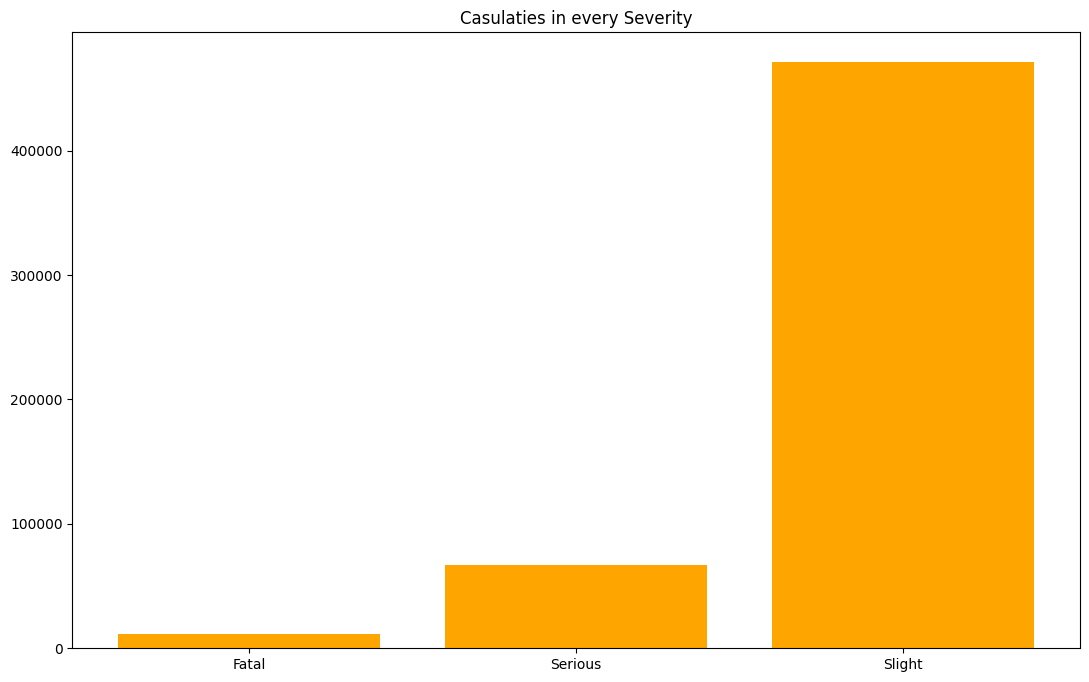

In [22]:
visual1 = accident.groupby(['Urban_or_Rural_Area','Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = visual1['Accident_Severity']
y = visual1['Number_of_Casualties']

plt.title('Casulaties in every Severity')
plt.bar(x,y,color = ['orange'])
plt.gcf().set_size_inches(13,8)
plt.show()

<h1><span style = color:red>Analysis No.2</span></h1>
<h2><span style = color:Yellow>Question: </span> Which vehicle type has the most fatal accident?</h2>

In [23]:
df_fatal = accident[accident['Accident_Severity'] == 'Fatal']
df_fatal['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      6577
Van / Goods 3.5 tonnes mgw or under       467
Motorcycle over 500cc                     339
Bus or coach (17 or more pass seats)      325
Goods 7.5 tonnes mgw and over             216
Motorcycle 125cc and under                189
Taxi/Private hire car                     155
Motorcycle over 125cc and up to 500cc     105
Motorcycle 50cc and under                  95
Other vehicle                              70
Goods over 3.5t. and under 7.5t            67
Minibus (8 - 16 passenger seats)           29
Agricultural vehicle                       21
Pedal cycle                                 6
Data missing or out of range                0
Ridden horse                                0
Name: count, dtype: int64

<h3><span style = color:green >Insight No:2</span> The vehicle that has the most fatal accident is the Car.</h3>

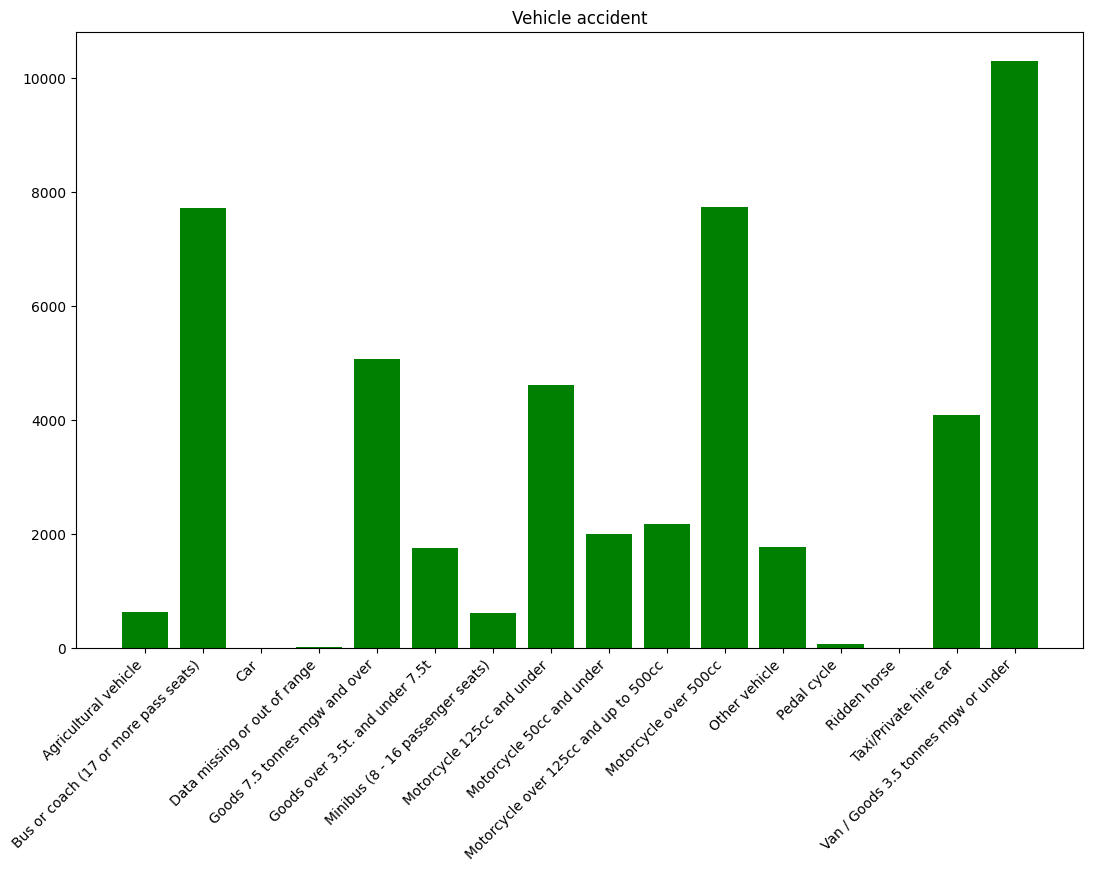

In [24]:
df_2020 = accident[accident['Year'] == 2020]
df_2020['Accident_Severity'].value_counts()
car = df_2020[(df_2020['Vehicle_Type'] != 'Pedal_Cycle') &( df_2020['Vehicle_Type'] != 'Car')]
visual2 = car.groupby(['Accident_Severity','Vehicle_Type'])['Number_of_Casualties'].sum().reset_index()


x = visual2['Vehicle_Type']
y = visual2['Number_of_Casualties']


plt.title('Vehicle accident')
plt.xticks(rotation=45, ha='right')
plt.bar(x,y,color = ['green'])
plt.gcf().set_size_inches(13,8)
plt.show()

<h1><span style = color:red>Analysis No.3</span></h1>
<h2><span style = color:Yellow>Question: </span>What Year has the most accident during the weather conditions of Fog or mist?</h2>

In [25]:
df_fog_mist = accident[accident['Weather_Conditions'] == 'Fog or mist']
df_fog_mist['Year'].value_counts()

Year
2020    981
2022    902
2019    857
2021    788
Name: count, dtype: int64

<h3><span style = color:green >Insight No:3</span>The Year that has the most accident during the weather condition of Fog or mist is the Year 2020.</h3>

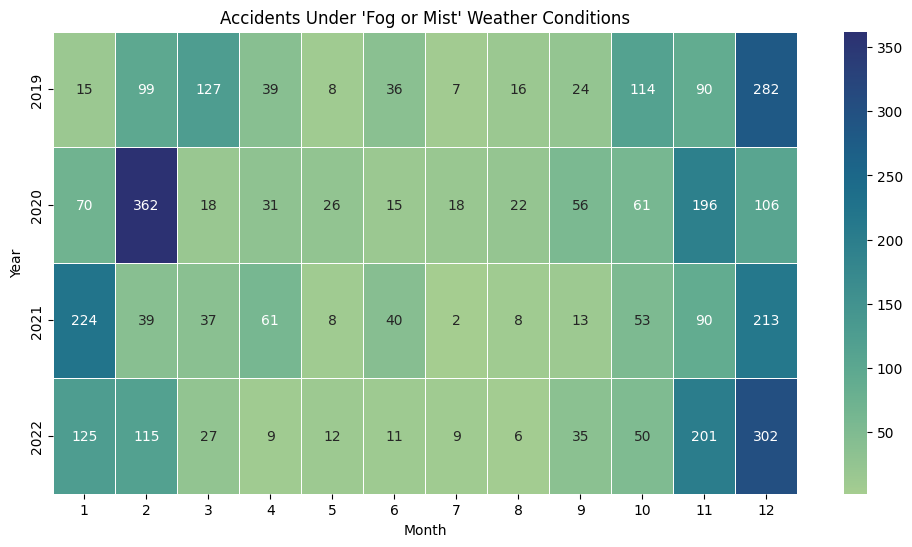

In [26]:

df_fog_mist = accident[accident['Weather_Conditions'] == 'Fog or mist']

heatmap_data = df_fog_mist.groupby(['Year', 'Month']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='crest', annot=True, fmt='d', linewidths=0.5)

plt.title("Accidents Under 'Fog or Mist' Weather Conditions")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


<h1><span style = color:red>Analysis No.4</span></h1>
<h2><span style = color:Yellow>Question: </span>Is there a correlation between the number of casualty and the number of vehicle?</h2>

In [27]:
df_casulaty_vehicle = accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])
np.round(df_casulaty_vehicle.mean(),1)


np.float64(0.2)

<h3><span style = color:green >Insight No:4</span> There is no correlation between the number of casualty and the number of vehicle.</h3>

<h1><span style = color:red>Analysis No.5</span></h1>
<h2><span style = color:Yellow>Question: </span>Accident Severity in every Road Type</h2>

In [28]:
df_severity_rtype = accident.groupby(['Accident_Severity', 'Road_Type'],observed = True).size()
df_severity_rtype.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unaccounted
Accident_Severity,,,,,,
Fatal,1815,95,142,6527,49,33
Serious,11746,1655,3665,70059,611,481
Slight,85863,11809,40185,415557,6381,4006


<h3><span style = color:green >Insight No:5</span> Single carriageways account for the highest number of serious accidents, with 70,059 cases (66.7%), and slight accidents, with 415,557 cases (69.4%), highlighting their vulnerability to severe crashes.</h3>

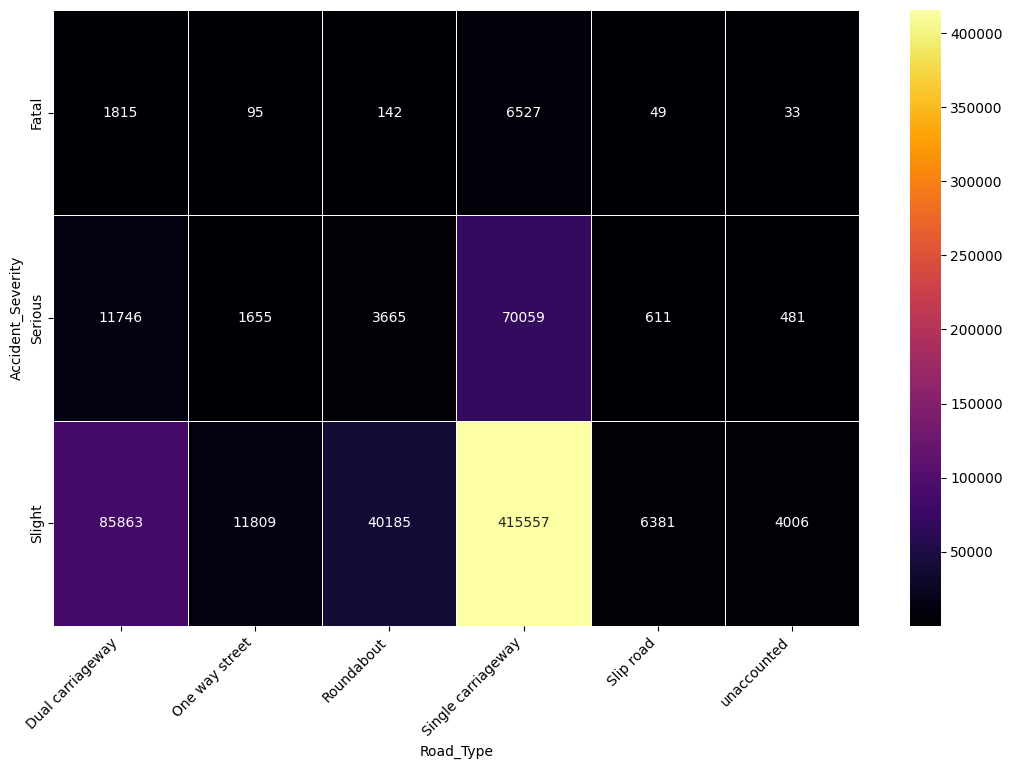

In [29]:
df_severity_rtype = accident.groupby(['Accident_Severity', 'Road_Type']).size().unstack()
sns.heatmap(df_severity_rtype, cmap='inferno', annot=True, fmt='d', linewidths=0.5)
plt.gcf().set_size_inches(13,8)
plt.xticks(rotation=45, ha='right')

plt.show()

<h1><span style = color:red>Analysis No.6</span></h1>
<h2><span style = color:Yellow>Question: </span> How many casualties occur during the Weather Condition of Snowing no high winds in the Year 2021?</h2>

In [30]:
df_snowing = accident[accident['Weather_Conditions']== 'Snowing no high winds']
df_2021 = df_snowing[df_snowing['Year'] == 2021]

Snowing = df_2021['Weather_Conditions'].value_counts()
print('Snowing no high winds:',Snowing.get('Snowing no high winds'))



Snowing no high winds: 1916


<h3><span style = color:green >Insight No:6</span> There are 2,923 casualties during Snowing no high winds in the Year 2021</h3>

In [31]:
df_2021_weather = accident[accident['Year'] == 2021]
snow_year = df_2021_weather.groupby(['Weather_Conditions', 'Year']).size().reset_index(name = "Snow_Accident")
pivot_table = snow_year.pivot(index='Weather_Conditions', columns='Year', values='Snow_Accident')
pivot_table

Year,2021
Weather_Conditions,
Fine + high winds,2097
Fine no high winds,131929
Fog or mist,788
Other,4502
Raining + high winds,2386
Raining no high winds,19682
Snowing + high winds,254
Snowing no high winds,1916


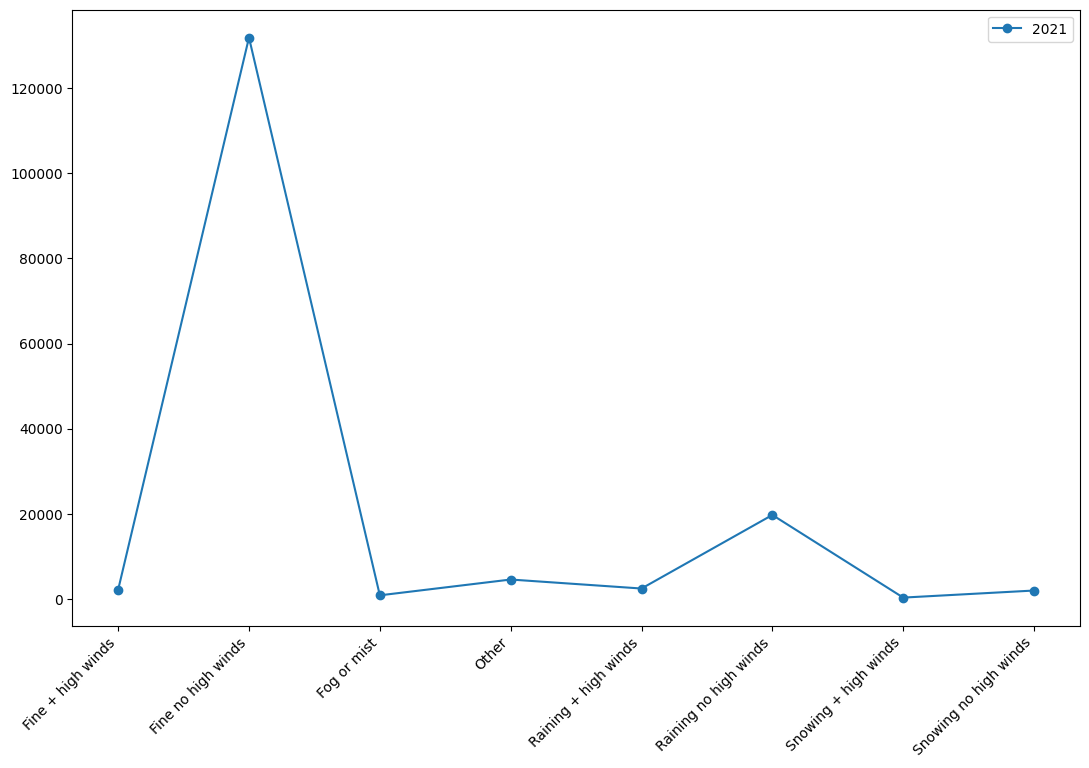

In [32]:
for x in pivot_table:
    plt.plot(pivot_table.index, pivot_table[x],label=x,marker= 'o')


plt.gcf().set_size_inches(13,8)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

<h1><span style = color:red>Analysis No.7</span></h1>
<h2><span style = color:Yellow>Question: </span> Which vehicle type usually gets an accident in Urban Area?</h2>

In [33]:
df_urban = accident[accident['Urban_or_Rural_Area'] == 'Urban']
df_urban['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      316062
Van / Goods 3.5 tonnes mgw or under       22003
Bus or coach (17 or more pass seats)      16851
Motorcycle over 500cc                     16700
Goods 7.5 tonnes mgw and over             11151
Motorcycle 125cc and under                10246
Taxi/Private hire car                      8617
Motorcycle over 125cc and up to 500cc      4982
Motorcycle 50cc and under                  4893
Goods over 3.5t. and under 7.5t            3864
Other vehicle                              3643
Agricultural vehicle                       1272
Minibus (8 - 16 passenger seats)           1258
Pedal cycle                                 127
Data missing or out of range                  6
Ridden horse                                  3
Name: count, dtype: int64

<h3><span style = color:green >Insight No:7</span> The type of vehicle that usually gets an accident in Urban Area is the Car</h3>

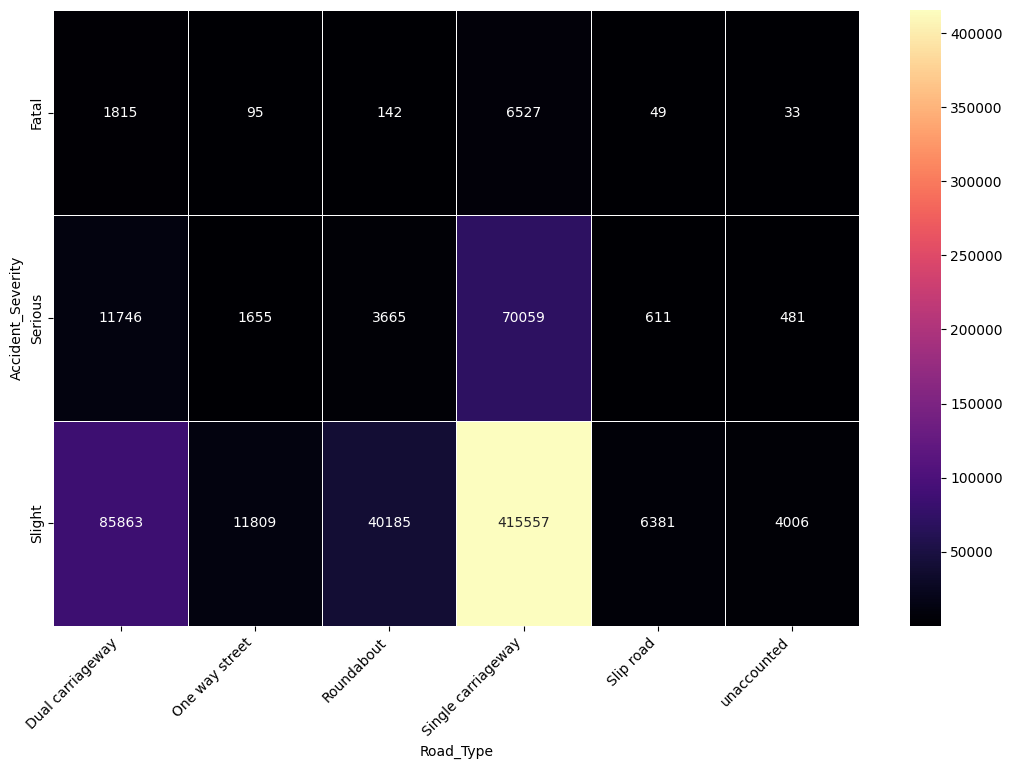

In [34]:
visual7 = accident.groupby(['Vehicle_Type', 'Urban_or_Rural_Area']).size().unstack()
# sns.heatmap(visual7,cmap="magma")
sns.heatmap(df_severity_rtype, cmap='magma', annot=True, fmt='d', linewidths=0.5)
plt.gcf().set_size_inches(13,8)
plt.xticks(rotation=45, ha='right', )

plt.show()

<h1><span style = color:red>Analysis No.8</span></h1>
<h2><span style = color:Yellow>Question: </span>How many accidents of Motorcycle over 500cc during Weather Conditions of Fine no high winds in Every Year?</h2>

In [35]:
df_no_winds = accident[accident['Weather_Conditions'] == 'Fine no high winds']

df_500cc = df_no_winds[df_no_winds['Vehicle_Type'] == 'Motorcycle over 500cc']

df_500cc['Year'].value_counts()

Year
2019    6223
2020    5366
2021    4964
2022    4240
Name: count, dtype: int64

<h3><span style = color:green >Insight No:8</span> In 2019 there are 6,223, in 2020 there are 5,366, in 2021 there are 4,964 and in 2022 there are 4,240 accidents of motorcycle over 500cc</h3>


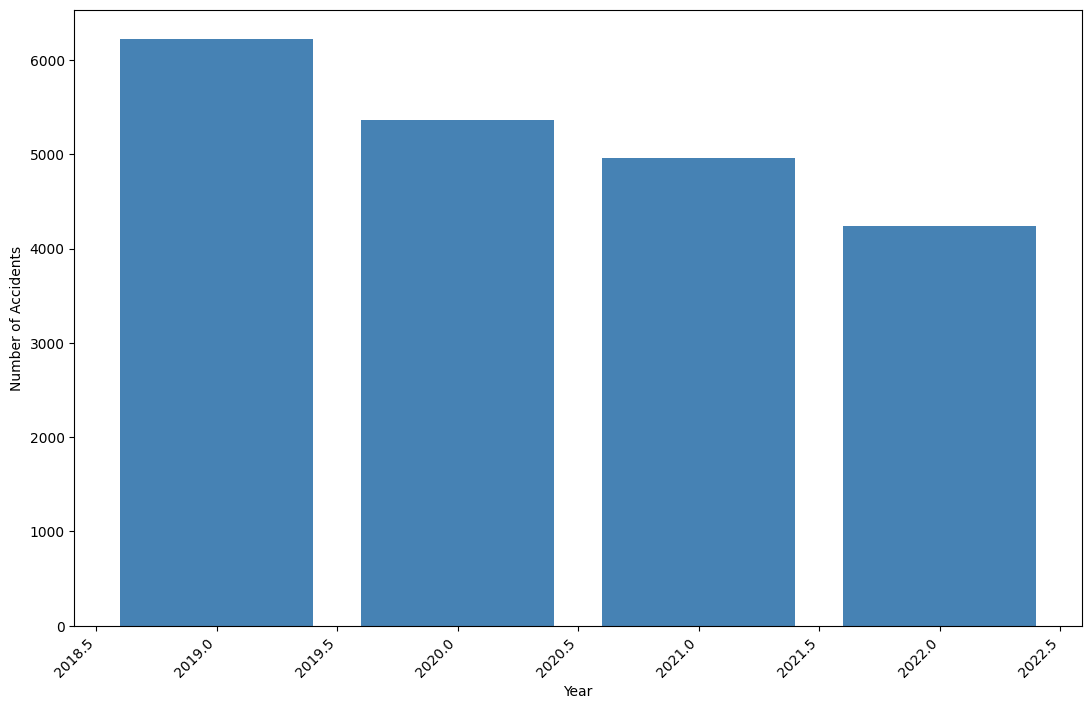

In [36]:

visual8 = df_500cc['Year'].value_counts().sort_index()

plt.gcf().set_size_inches(13,8)
plt.bar(visual8.index, visual8.values, color='steelblue')

plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right', )

plt.show()


<h1><span style = color:red>Analysis No.9</span></h1>
<h2><span style = color:Yellow>Question: </span>In what Road Type usually has an accident of motorcycle over 500cc</h2>

In [37]:
df_500cc = accident[accident['Vehicle_Type'] == 'Motorcycle over 500cc']
df_500cc['Road_Type'].value_counts()

Road_Type
Single carriageway    19050
Dual carriageway       3930
Roundabout             1737
One way street          499
Slip road               284
unaccounted             157
Name: count, dtype: int64

<h3><span style = color:green >Insight No:9</span> The Road Type that usually has an accident of motorcycle over 500cc is the Single Carriageway that has 19050</h3>

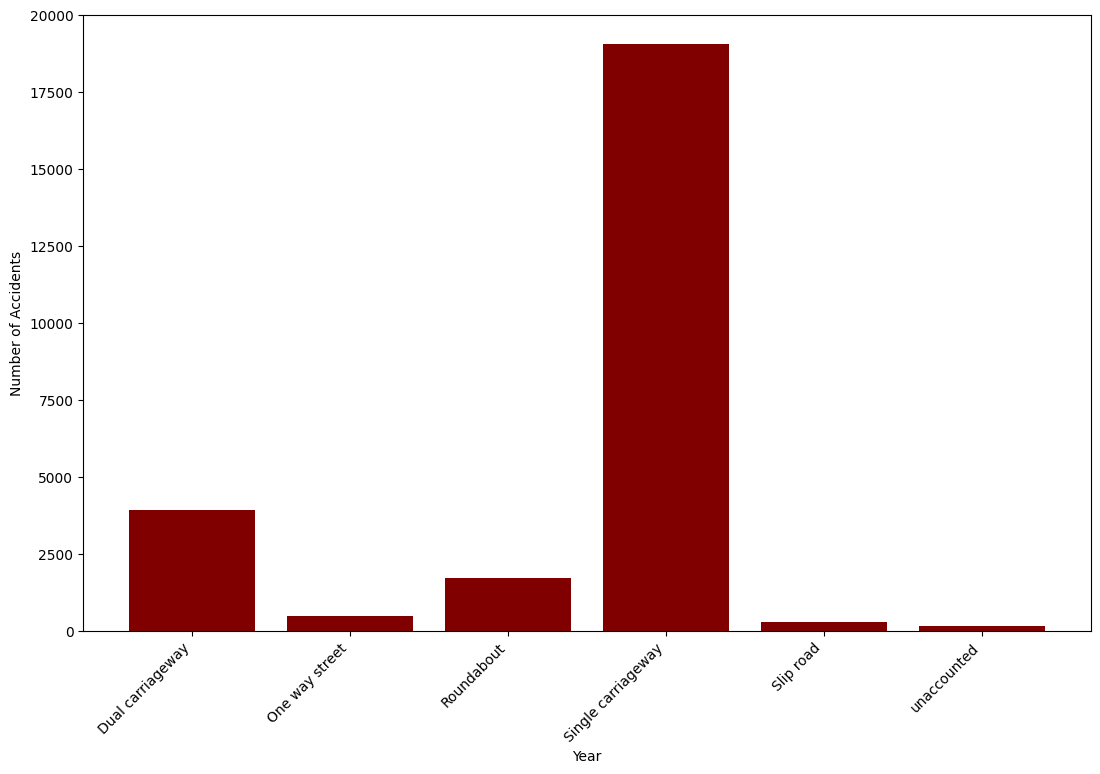

In [38]:
visual9 = df_500cc['Road_Type'].value_counts().sort_index()

plt.gcf().set_size_inches(13,8)
plt.bar(visual9.index, visual9.values, color='maroon')

plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right', )

plt.show()

<h1><span style = color:red>Analysis No.10</span></h1>
<h2><span style = color:Yellow>Question: </span>Total casualties in every Road Type of every different Year </h2>

In [39]:
df_severity_rtype = accident.groupby(['Year', 'Road_Type'],observed = True).size()
df_severity_rtype.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unaccounted
Year,,,,,,
2019,28162,3813,11698,134898,1974,1570
2020,25795,3549,11365,126633,1833,1416
2021,24052,3271,11041,122573,1698,919
2022,21415,2926,9888,108039,1536,615


<h3><span style = color:green >Insight No:10</span> The total casualties across all road types have been decreasing from 2019 to 2022, with single carriageways experiencing the highest decline from 134,898 in 2019 to 108,039 in 2022, a 19.9% decrease.</h3>

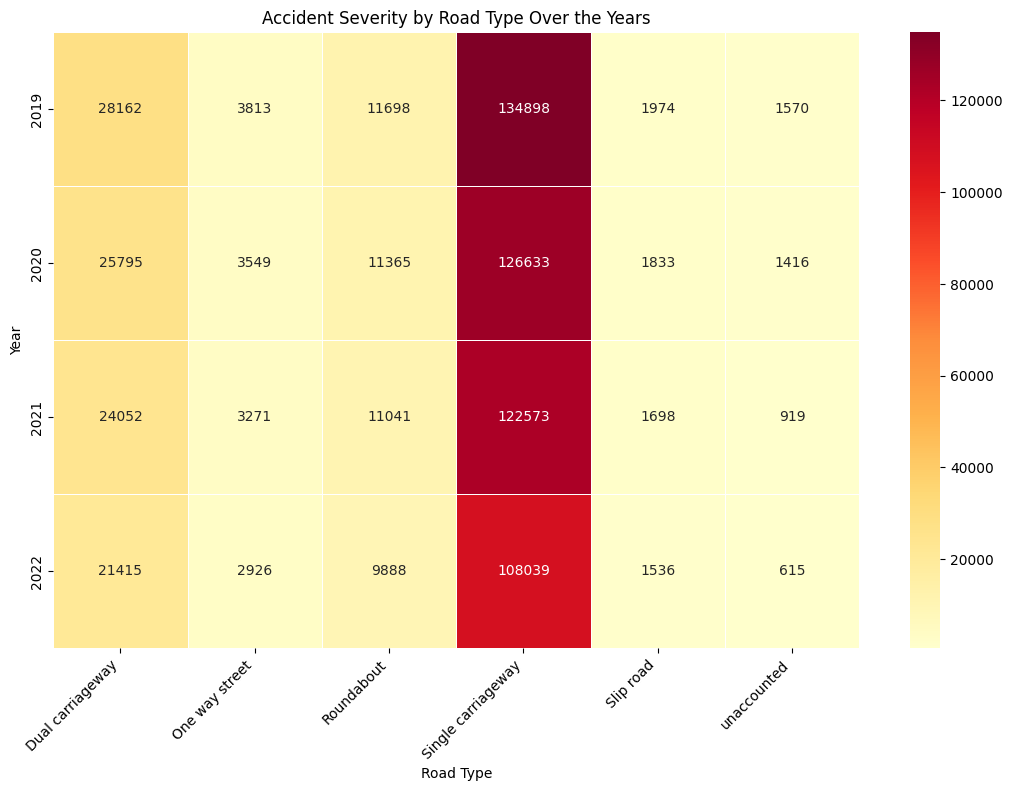

In [40]:

df_severity_rtype = accident.groupby(['Year', 'Road_Type']).size().unstack()

plt.figure(figsize=(13, 8))
sns.heatmap(df_severity_rtype, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)

plt.title("Accident Severity by Road Type Over the Years")
plt.xlabel("Road Type")
plt.ylabel("Year")
plt.xticks(rotation=45, ha='right', )

plt.show()


<h1><span style = color:red>Analysis No.11</span></h1>
<h2><span style = color:Yellow>Question: </span>What Day in a week has the highest percentage of Fatal accidents?</h2>

In [41]:
df_fatal = accident[accident['Accident_Severity'] == 'Fatal'] 

fatal = df_fatal['Accident Date'].dt.dayofweek.value_counts().max()

percentage = np.round((fatal/df_fatal['Accident Date'].dt.dayofweek.value_counts().sum())*100, 2)
print(f"{percentage}%")

df_fatal['Accident Date'].dt.dayofweek.value_counts()

17.57%


Accident Date
6    1522
0    1385
5    1326
4    1113
2    1113
1    1105
3    1097
Name: count, dtype: int64

<h3><span style = color:green >Insight No:11 </span>According to the analysis, Sunday has the highest number of fatal accidents, totaling 1,522. This accounts for 17.57% of all accidents with fatal severity.</h3>

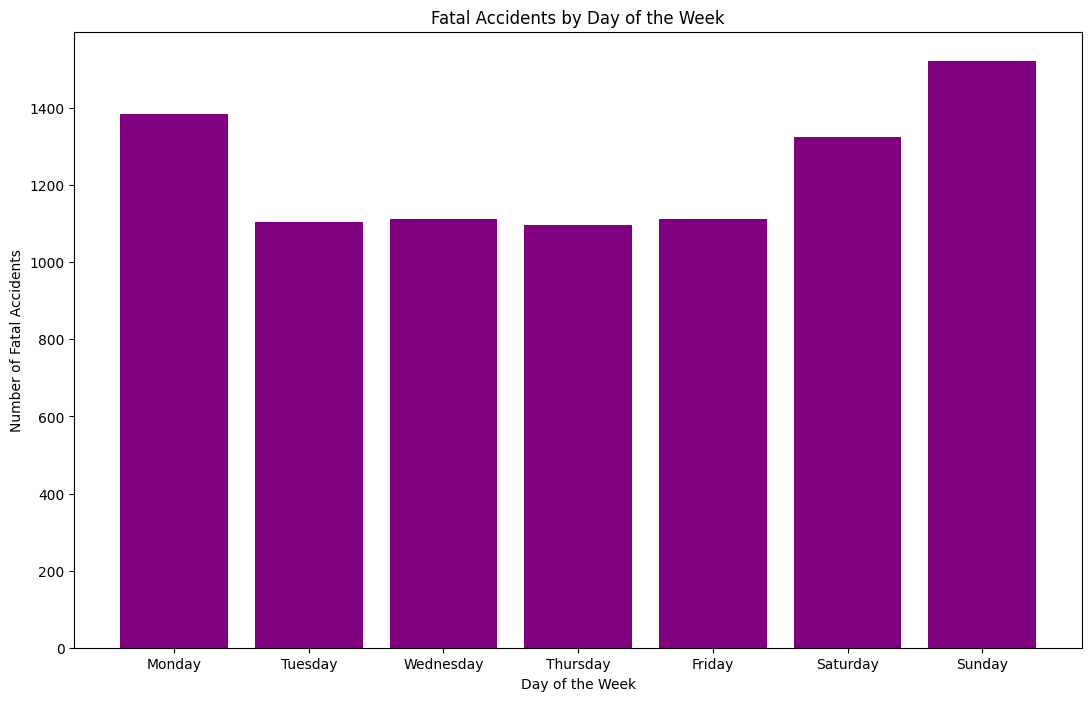

In [42]:

fatal_counts = df_fatal['Accident Date'].dt.dayofweek.value_counts().sort_index()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(13, 8))
plt.bar(days, fatal_counts, color='purple')

plt.xlabel("Day of the Week")
plt.ylabel("Number of Fatal Accidents")
plt.title("Fatal Accidents by Day of the Week")

plt.show()


<h1><span style = color:red>Analysis No.12</span></h1>
<h2><span style = color:yellow;>Question:</span> What Accident Severity has is the highest number of accidents under different road conditions and in what Year? </h2>

In [43]:
df_severity_RYA = accident.groupby(['Road_Surface_Conditions', 'Year', 'Accident_Severity'],observed = False).size()
df_severity_RYA.unstack()

Accident_Severity             Fatal  Serious  Slight
Road_Surface_Conditions Year                        
Dry                     2019   1850    17199  106498
                        2020   1541    15766   96409
                        2021   1333    15325   93777
                        2022   1066    13418   84365
Flood over 3cm. deep    2019      4       54     254
                        2020      6       45     280
                        2021     11       33     216
                        2022      2       20      92
Frost or ice            2019     31      284    2254
                        2020     47      463    3360
                        2021     61      557    4647
                        2022     54      703    6056
Snow                    2019      3       51     480
                        2020      5       71     522
                        2021      7      180    1622
                        2022     20      263    2666
Wet or damp             2019    826     6734   45593
                        2020    742     6776   44558
                        2021    645     5902   39238
                        2022    407     4373   30914

<h3><span style = color:green >Insight No:12 </span>According to the analysis, the Accident Severity that has the highest accident under Road Surface Condition is the Slight that has 106,498 on the year of 2019</h3>

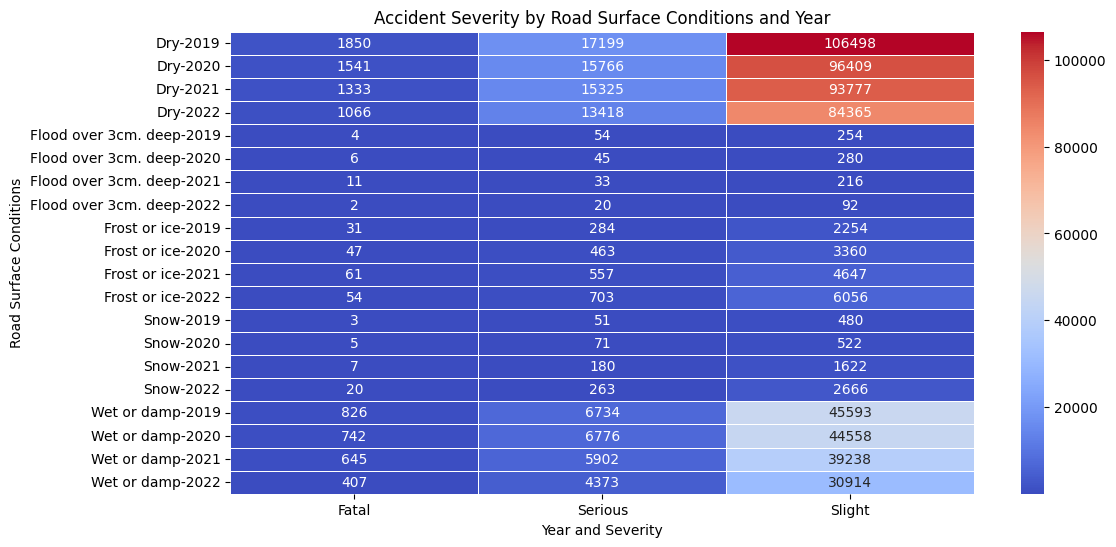

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df_severity_RYA.unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Accident Severity by Road Surface Conditions and Year")
plt.xlabel("Year and Severity")
plt.ylabel("Road Surface Conditions")
plt.show()


<h1><span style = color:red>Analysis No.13</span></h1>
<h1><span style = color:yellow;>Question:</span>How many percent of accidents happens in the year 2021 on the Road Type of Slip Road?</h1>

In [45]:
df_severity_RYA = accident.groupby(['Road_Type', 'Year'],observed = False).size()
df_severity_RYA.unstack()

Year,2019,2020,2021,2022
Road_Type,,,,
Dual carriageway,28162,25795,24052,21415
One way street,3813,3549,3271,2926
Roundabout,11698,11365,11041,9888
Single carriageway,134898,126633,122573,108039
Slip road,1974,1833,1698,1536
unaccounted,1570,1416,919,615


In [46]:
df_slip_road = accident[accident['Road_Type'] == 'Slip road']


df_sliproad_2021 = accident[accident['Year'] == 2021]


tt_percent_2021 = np.round((len(df_slip_road) / len(df_sliproad_2021)) * 100, 2)

print(f"{tt_percent_2021}%")


4.31%


<h3><span style = color:green >Insight No:13 </span> According to the analysis, there were 1,698 accidents in 2021 on Slip Roads, accounting for 4.31% of the overall accidents. </h3>

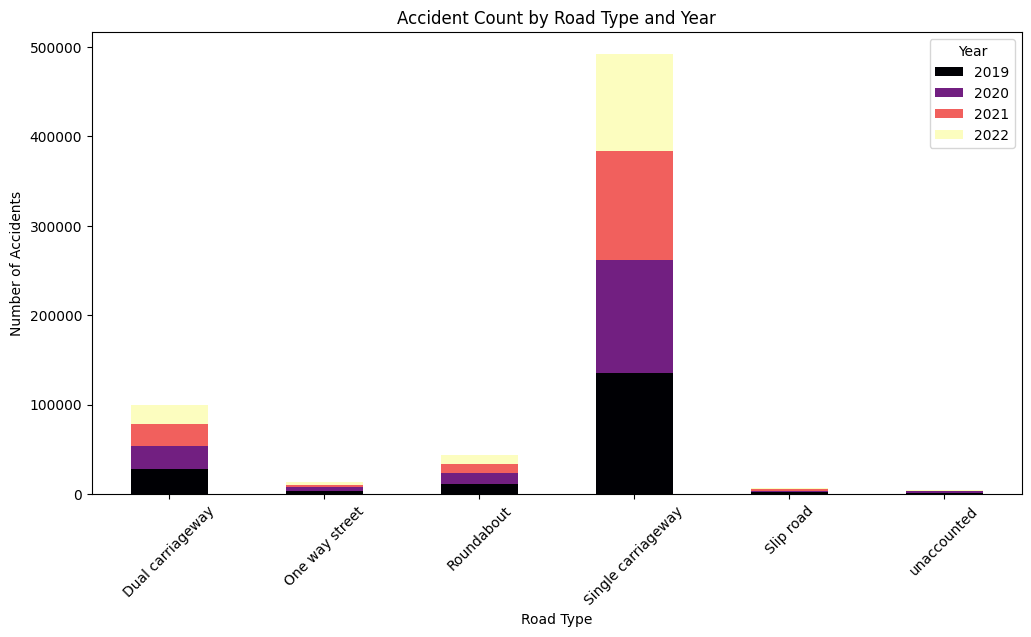

In [47]:
import matplotlib.pyplot as plt

df_plot = df_severity_RYA.unstack().fillna(0)

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='magma')

plt.title("Accident Count by Road Type and Year")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.show()


<h1><span style = color:red>Analysis No.14</span></h1>

In [48]:
severity_weather_road = accident.groupby(['Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions'],observed=False).size()
severity_weather_road.unstack()


Road_Surface_Conditions                     Dry  Flood over 3cm. deep  \
Accident_Severity Weather_Conditions                                    
Fatal             Fine + high winds         103                     1   
                  Fine no high winds       5653                     6   
                  Fog or mist                18                     0   
                  Other                      12                     0   
                  Raining + high winds        0                     5   
                  Raining no high winds       2                    11   
                  Snowing + high winds        0                     0   
                  Snowing no high winds       2                     0   
Serious           Fine + high winds         758                     0   
                  Fine no high winds      60541                    23   
                  Fog or mist                63                     1   
                  Other                     259                     2   
                  Raining + high winds       12                    40   
                  Raining no high winds      66                    85   
                  Snowing + high winds        1                     0   
                  Snowing no high winds       8                     1   
Slight            Fine + high winds        4165                    14   
                  Fine no high winds     373539                   103   
                  Fog or mist               392                     2   
                  Other                    2363                    17   
                  Raining + high winds       60                   246   
                  Raining no high winds     483                   452   
                  Snowing + high winds        3                     3   
                  Snowing no high winds      44                     5   

Road_Surface_Conditions                  Frost or ice  Snow  Wet or damp  
Accident_Severity Weather_Conditions                                      
Fatal             Fine + high winds                 3     0           68  
                  Fine no high winds              125    14         1409  
                  Fog or mist                       8     0           56  
                  Other                            43     1          109  
                  Raining + high winds              1     0          139  
                  Raining no high winds             5     1          829  
                  Snowing + high winds              0     2            1  
                  Snowing no high winds             8    17            9  
Serious           Fine + high winds                21     2          464  
                  Fine no high winds             1258   114        11349  
                  Fog or mist                      78     4          337  
                  Other                           477    47         1016  
                  Raining + high winds              5     0         1204  
                  Raining no high winds            42    11         9264  
                  Snowing + high winds             17    67           24  
                  Snowing no high winds           109   320          127  
Slight            Fine + high winds               159    17         2779  
                  Fine no high winds             9495   973        70411  
                  Fog or mist                     623    23         1923  
                  Other                          4198   365         8241  
                  Raining + high winds             46    16         7841  
                  Raining no high winds           357    94        67994  
                  Snowing + high winds            145   480          142  
                  Snowing no high winds          1294  3322          972

<h3> <span style = color:green>Insight No.14</span> Snowing with no high winds showed a dramatic increase in slight accidents 1,294 cases on dry roads, 3,322 on wet roads</h3>

<h3> <span style = color:green>Insight No.15 </span>Raining with no high winds led to significantly more serious accidents 9,264 cases compared to raining with high winds 1,204 cases.</h3>

<h3> <span style = color:green>Insight No.16 </span>Frost or ice conditions led to more slight accidents 9,495 cases than serious or fatal ones, suggesting that while dangerous, drivers are likely to avoid severe collisions.</h3>

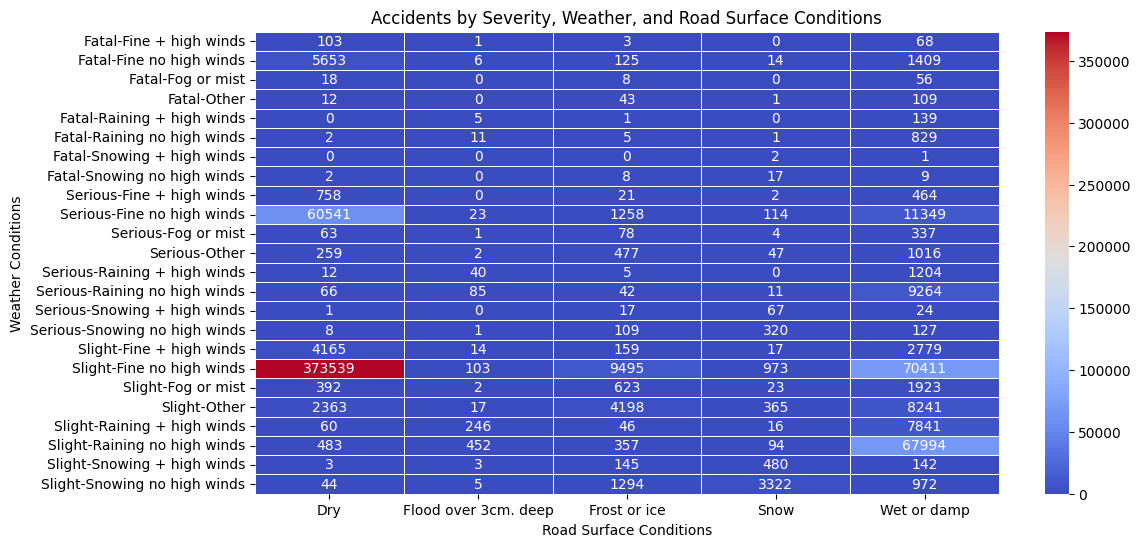

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame format for heatmap
df_plot = severity_weather_road.unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(df_plot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Accidents by Severity, Weather, and Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Weather Conditions")
plt.show()


<h1><span style = color:red>Analysis No.15</span></h1>

In [50]:
accident.groupby(['Light_Conditions', 'Urban_or_Rural_Area', 'Accident_Severity'],observed=False).size().unstack()

Accident_Severity                                Fatal  Serious  Slight
Light_Conditions            Urban_or_Rural_Area                        
Darkness - lighting unknown Rural                   41      344    2082
                            Unallocated              0        0       0
                            Urban                   27      450    3540
Darkness - lights lit       Rural                  578     3827   20290
                            Unallocated              0        0       2
                            Urban                 1282    15303   88053
Darkness - lights unlit     Rural                   29      150     782
                            Unallocated              0        0       0
                            Urban                   16      210    1356
Darkness - no lighting      Rural                 1569     6861   27087
                            Unallocated              0        0       0
                            Urban                   43      313    1564
Daylight                    Rural                 3384    26130  145836
                            Unallocated              0        1       8
                            Urban                 1692    34628  273201

<h3> <span style = color:green>Insight No.17 </span>Under "Darkness - lights lit" conditions, 88,053 slight, 15,303 serious, and 1,282 fatal accidents happened in urban areas. In rural areas, 20,290 slight, 3,827 serious, and 578 fatal accidents occurred. Despite lighting, a significant number of accidents happen, likely due to impaired driver vision and high-speed driving.</h3>

<h3> <span style = color:green>Insight No.18 </span>Unlike slight accidents, which are highly concentrated in urban areas, serious accidents are more evenly distributed. Rural areas had 6,861 serious accidents under "Darkness - no lighting," while urban areas had only 313 under the same condition. This indicates that crashes in rural areas tend to be more severe.</h3>

<h3> <span style = color:green>Insight No.19 </span>In daylight, urban areas had 273,201 slight accidents, but rural areas had only 145,836. However, the fatality count in rural areas (3,384) is almost double that in urban areas (1,692). This suggests that rural accidents are deadlier due to high-speed roadways and delayed medical response.</h3>

<h3> <span style = color:green>Insight No.20 </span>In rural areas, 5.8% of accidents under "Darkness - no lighting" were fatal (1,569 out of 27,087 slight accidents). In urban areas, this rate is significantly lower (43 out of 1,564 slight accidents). This shows that rural areas are riskier in unlit conditions due to higher speeds and longer emergency response times.</h3>

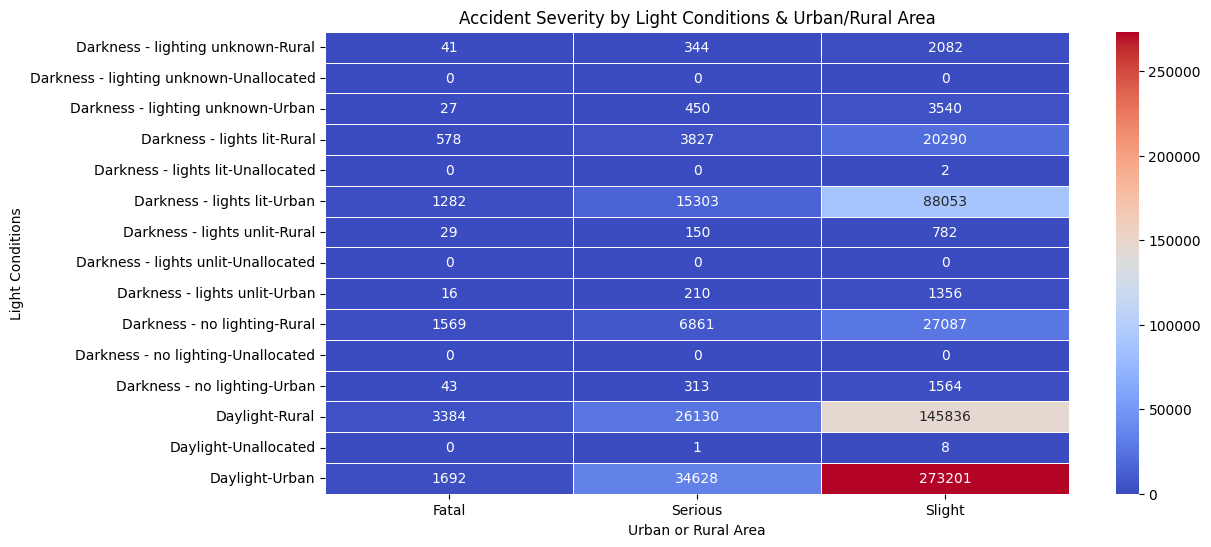

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame format for heatmap
df_plot = accident.groupby(['Light_Conditions', 'Urban_or_Rural_Area', 'Accident_Severity']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(df_plot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Accident Severity by Light Conditions & Urban/Rural Area")
plt.xlabel("Urban or Rural Area")
plt.ylabel("Light Conditions")
plt.show()


<h1><span style = color:red>Analysis No.16</span></h1>

In [52]:
df_province= accident[accident['Accident_Severity'] == 'Fatal']
df_birmingham= df_province[df_province['District Area']=='Birmingham']

df_birmingham['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       53
Darkness - lights lit          47
Darkness - lights unlit         3
Darkness - lighting unknown     2
Darkness - no lighting          0
Name: count, dtype: int64

<h3> <span style = color:green>Insight No.21 </span>The number of fatal accidents in Birmingham during daylight is 53, which accounts for 50.48% of all accidents that occur in daylight.</h3

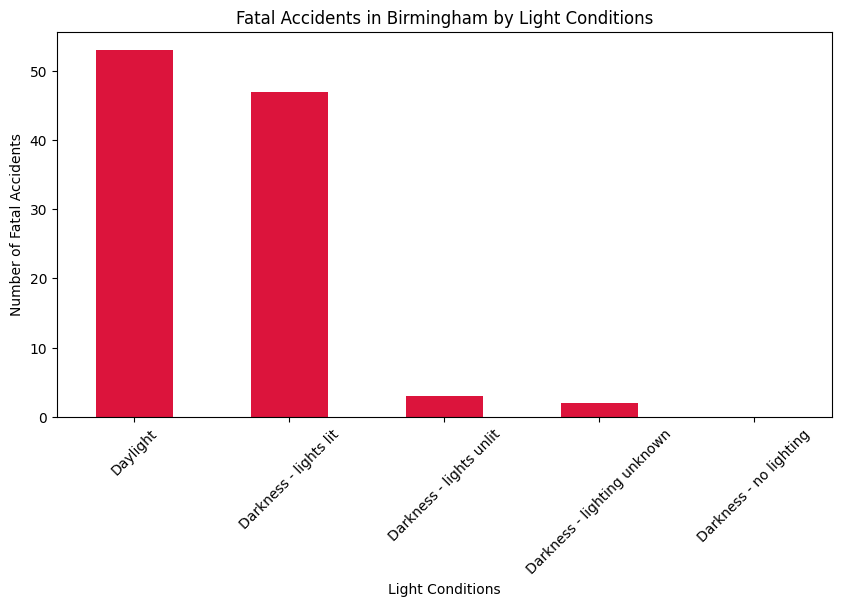

In [53]:
import matplotlib.pyplot as plt

# Count fatal accidents per light condition
light_counts = df_birmingham['Light_Conditions'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 5))
light_counts.plot(kind='bar', color='crimson')

plt.title("Fatal Accidents in Birmingham by Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=45)

plt.show()


<h1><span style = color:red>Analysis No.17</span></h1>

In [54]:
df_daylight = df_birmingham[df_birmingham['Light_Conditions']=='Daylight']
df_daylight['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       43
Raining no high winds     5
Other                     3
Fine + high winds         1
Fog or mist               1
Raining + high winds      0
Snowing + high winds      0
Snowing no high winds     0
Name: count, dtype: int64

<h3> <span style = color:green>Insight No.22 </span>The number of accidents during daylight in the weather conditions of fine no high winds is 43, which accounts for 81.13% of all accidents that occur in daylight.</h3

<h1>Area Analysis</h1>

In [57]:
accident.columns


Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [58]:
area_year = accident.groupby(['District Area', "Year"]).size().reset_index(name = "Accident_Count")
pivot_table = area_year.pivot(index='Year', columns='District Area', values='Accident_Count')
pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


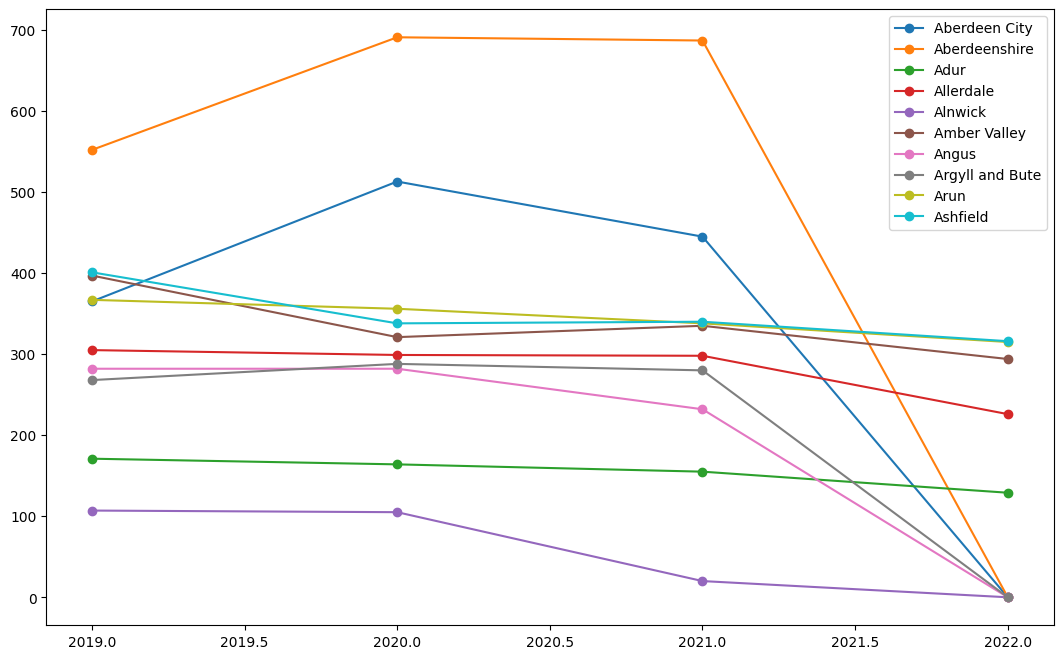

In [59]:
count = 0

for x in pivot_table:
    count += 1 
    plt.plot(pivot_table.index, pivot_table[x],label=x,marker= 'o')
    if count == 10:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()